In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants, optimize
from pyproj import geod
import pickle

# Load the node config dictionary this contains information about the nodes
# (receivers) position and name
node_config = np.load("node_config_fixed.npy", allow_pickle=True)

# Now load in waveforms
waveforms = np.load("exported_waveforms.npy", allow_pickle=True)

# For each waveform the following variables are available
# envelope      : The magnitude of the waveform envelope with time
# FT            : The Fast fourier transform of samples
# FT_recon      : The Fast fourire transform of the reconstructed time series
# node_unique_id: A 17 character unique identifier for a node
# peak_index    : The index in the raw data stream that the peak in envelope resides
# prod_time     : The time the waveform was extracted
# raw_data      : The raw time series the waveform was extracted from that has been high pass filtered at 1kHz
# recon_data    : The reconstructed complex time series the waveform was extracted from same as reconstructed samples
# samples       : The real part of extracted waveform
# site_name     : Name of site waveform was recorded at
# t1            : The sum of samples ^ 2
# tdv_penalty   : A time difference variance penalty 
# timestamp     : np.datetime64 object which contains the timestamp at index 256 of samples, envelope, raw_data and recon_data

# The sampling resolution of LEELA is 9.142 us



In [271]:
df_waveforms = pd.DataFrame(waveforms)
seven = waveforms[7]
three = waveforms[0]



Watnall 918 1.6962697486405112e+18 1696269748634597285
Herstmonceux 927 1.6962697486405112e+18 1696269748634775093
Camborne 183 1.6962697486405112e+18 1696269748635404467
Cabauw 630 1.6962697486405112e+18 1696269748635628839
Lerwick 1000 1.6962697486405112e+18 1696269748637255809
Gibraltar 863 1.6962697486405112e+18 1696269748640214362
Tartu 181 1.6962697486405112e+18 1696269748640511339


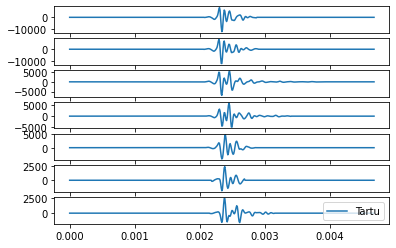

[['Watnall', 0.0],
 ['Herstmonceux', 8.227799999999987e-05],
 ['Camborne', -0.0067193700000000006],
 ['Cabauw', -0.002632896],
 ['Lerwick', 0.000749643999999999],
 ['Gibraltar', -0.0005028099999999994],
 ['Tartu', -0.006737654]]

In [261]:
fig, axs = plt.subplots(7, 1)

# Define sampling frequency
fs = 9.142e-6 

# Finding the difference in time between the peak_index and index of timestamp
reference_peak_time = (waveforms[0]['peak_index'])*9.142e-6

# Define reference timestamp using first node
#reference_peaktime = waveforms[0]['timestamp'].item()+reference_peak_difference 
timedeltas = []
# Loop over each node
for i in range(len(waveforms)-1):
    
    peak_time = (waveforms[i]['peak_index'])*9.142e-6
    
    #peaktime = waveforms[i]['timestamp'].item()+peak_difference
    
    # Extract data for current node
    data = waveforms[i]
    
    print(data['site_name'], data['peak_index'], peaktime, data['timestamp'].item())
    
    # Create time vector for plotting data
    time = np.arange(len(data['samples']))*fs
    
    # Find timedelta between current node and reference
    timedelta = peak_time - reference_peak_time
    
    # Append timedelta to timedeltas
    timedeltas.append([data['site_name'], timedelta.item()])
    
    # Offset time vector by timedelta
    time += timedelta.item()*10**-9
    
    
    # Define current axis
    ax = axs[i]
    
    # Plot waveform on figure, label each trace with the node name
    ax.plot(time, data['samples'], label = data['site_name'])

# Display legend on figure


plt.legend()
plt.show()
timedeltas

In [266]:
nodes = node_config.item()
df_nodes = pd.DataFrame(nodes)
positions = df_nodes.loc[["Position","Site"]]

nodes['569218Q0B0024002A']['Position']['lat']


34.585925

In [203]:
# Equation 2 

# v_p = phase propagation velocity
# d_GA = distance between the guess G and point A
# d_GB = distance between the guess G and point B

v_p=1.00425*2.99792458*10**8 
d_GA

def TATD(d_GA, d_GB, v_p):
    return abs(d_GA) / v_p - abs(d_GB) / v_p


NameError: name 'd_GA' is not defined

In [30]:
# Equation 1

# TATD = Theoretical arrival time difference 
# OATD = Observed arrival time difference 

def RES(TATD, OATD, sigma, N):
    return np.sqrt(1/(N-2) * np.sum((TATD - OATD)**2 / sigma**2))

In [193]:
#Geod function

from pyproj import Geod

# Define a Geod object
geod = Geod(ellps='WGS84')

# Calculate forward and backward azimuths and distance from two points
fwd_azimuth, back_azimuth, distance = geod.inv(0, 0, 32.990287, 34.585925)


-130.99759611667753

38.46438549391419

In [228]:
from scipy.optimize import minimize

# Define the function to be minimized
def f(x):
    
    
    
    
    
    
    
    
    
    
    # Define a Geod object
geod = Geod(ellps='WGS84')

# Calculate forward and backward azimuths and distance from two points
fwd_azimuth, back_azimuth, distance = geod.inv(0, 0, 32.990287, 34.585925)

def TATD(d_GA, d_GB, v_p):
    
    return abs(d_GA) / v_p - abs(d_GB) / v_p


def RES(TATD, OATD, sigma, N):
    return np.sqrt(1/(N-2) * np.sum((TATD - OATD)**2 / sigma**2))


    return RES 

# Initial guess for x and y
x0 = [0, 0]

# Call minimize
result = minimize(f, x0)

# Print the result
print(f"The minimum value of f(x, y) is {result.fun} and is achieved at x = {result.x[0]}, y = {result.x[1]}")

The minimum value of f(x, y) is 1.705780445775116e-16 and is achieved at x = 0.9999999941591433, y = 1.9999999883182862


In [1]:
import numpy as np
import pyproj
from scipy.optimize import minimize

# Load the data
node_config = np.load("node_config_fixed.npy", allow_pickle=True).item()
waveforms = np.load("exported_waveforms.npy", allow_pickle=True)

# Define the functions for the equations
def equation1(params, *args):
    # Your implementation here
    pass

def equation2(params, *args):
    # Your implementation here
    pass

# Define the minimisation function
def minimisation_function(equation, ATDs, node_locations):
    initial_guess = [0, 0]  # replace with your initial guess for latitude and longitude
    result = minimize(equation, initial_guess, args=(ATDs, node_locations))
    return result.x  # this will be an array with the latitude and longitude

# Calculate ATDs
reference_waveform = waveforms[0]  # replace with your reference waveform
ATDs = [waveform["timestamp"] - reference_waveform["timestamp"] for waveform in waveforms]

# Get the node locations
node_locations = [node_config[node_id]["location"] for node_id in node_config]

# Use the minimisation function to get the position of the lightning strike
lightning_position = minimisation_function(equation1, ATDs, node_locations)

KeyError: 'location'

In [ ]:
import numpy as np
from scipy.optimize import minimize
from pyproj import Geod

def TATD(node_loc, strike_loc, vp):
    geod = Geod(ellps='WGS84')
    _, _, dist_GA = geod.inv(node_loc[0], node_loc[1], strike_loc[0], strike_loc[1])
    _, _, dist_GB = geod.inv(node_loc[0], node_loc[1], 0, 0)
    return abs(dist_GA / vp) - abs(dist_GB / vp)

def RES(params, ATDs, node_locs, vp):
    N = len(ATDs)
    strike_loc = params
    TATDs = [TATD(node_loc, strike_loc, vp) for node_loc in node_locs]
    return np.sqrt(1 / (N - 2) * sum((TATD - OATD)**2 / sigma**2 for TATD, OATD, sigma in zip(TATDs, ATDs, sigmas)))

def minimize_RES(ATDs, node_locs, vp):
    initial_guess = [0, 0]
    result = minimize(RES, initial_guess, args=(ATDs, node_locs, vp))
    return result.x

node_config = np.load('node_config_fixed.npy', allow_pickle=True).item()
exported_waveforms = np.load('exported_waveforms.npy', allow_pickle=True)

node_locs = [node_config[node_id]['location'] for node_id in exported_waveforms.keys()]
vp = 300000 # Speed of light in km/s

# Calculate ATDs
timestamps = [waveform['timestamp'] for waveform in exported_waveforms.values()]
reference_timestamp = timestamps[0]
ATDs = [timestamp - reference_timestamp for timestamp in timestamps]

# Minimize RES to find lightning strike location
strike_loc = minimize_RES(ATDs, node_locs, vp)
print(f'The lightning strike occurred at {strike_loc}')